# **Lawyer Recommendation System**

# **Data Collection**

data is collected from https://www.pathlegal.in/lawyers/India
using Selenimum and Beautifull Soup library

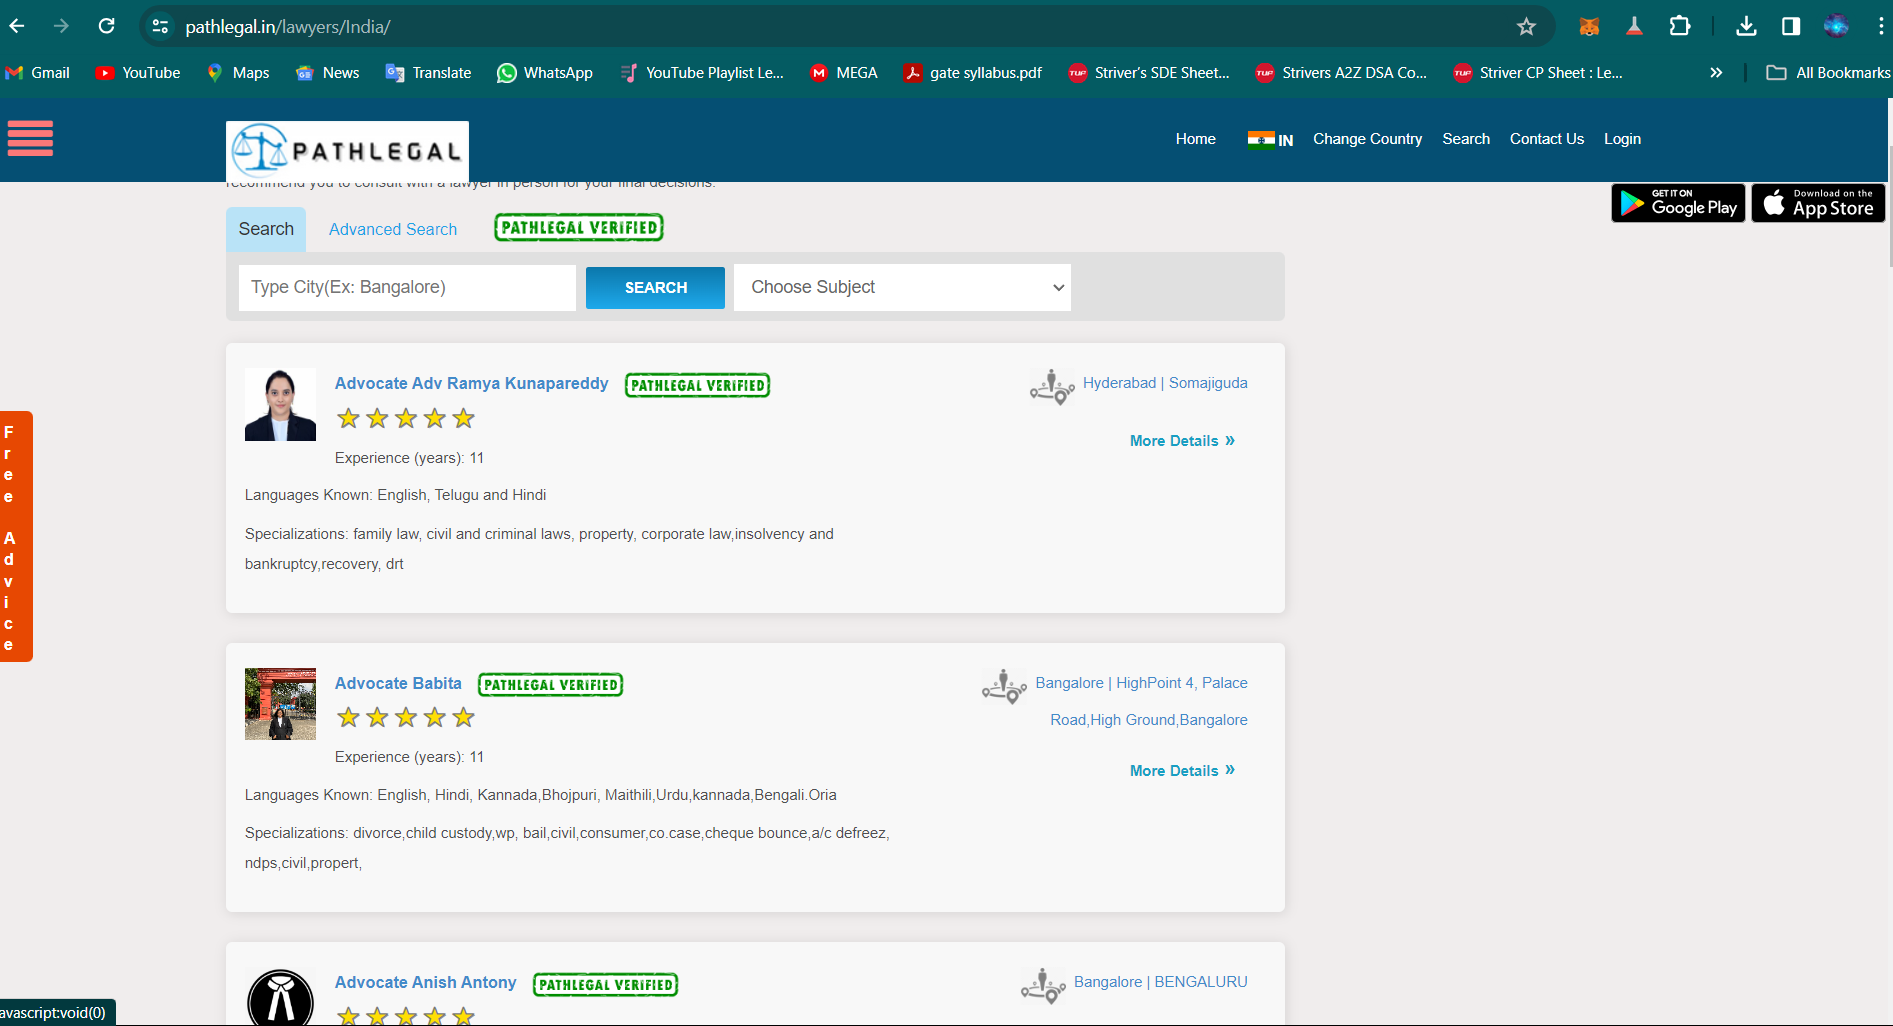

In [ ]:
#import libraries
%pip install requests
import requests
from bs4 import BeautifulSoup
import csv
%pip install selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

url = 'https://www.pathlegal.in/lawyers/India/page'

# initialise empty list to store lawyers data
lawyers = []


#try except for handling error
try:
  # loop will run for 100 pages of website each page contains aproxx 20 lawyers data
   for page in range(1,100):

      #create chrome webdriver instance
      driver = webdriver.Chrome(ChromeDriverManager().install())

      #wait to load web browser
      driver.implicitly_wait(1000)

      #get response form url of webpage
      driver.get(url+str(page))
      print(url+str(page)) # https://www.pathlegal.in/lawyers/India/page2 for page no. 2

      #wait to load website
      driver.implicitly_wait(100)

      #html page source of website
      html = driver.page_source

      #soup is the object allow to interact with html page source
      soup = BeautifulSoup(html, 'html.parser')

      #find all div of class name section01 in html page source
      section = soup.find_all('div',class_="section01")

      #iterate all div
      for x in section:

        # x is html object of data of 1 lawyer

         lawyer ={}

        #get all text inside of div
         data = x.text
         para = data.split("\n")

         i = 0
         for line in para:
            if "Advocate" in line:
               lawyer["name"] = line
            if "Experience" in line:
               lawyer["exp"] = line.split(" ")[2]
            if "Languages" in line:
               lawyer["lang"] = line.split(" ")[2]
            if "Specializations:" in line:
               for s in para[i+1].split("\t"):
                  if s != "":
                     lawyer["spec"] = s
            if "|" in line:
               if len(para[i-1].split("\t"))>14:
                  lawyer["loc"] = para[i-1].split("\t")[14]
               elif len(para[i+1].split("\t"))>14:
                  lawyer["loc"] = para[i+1].split("\t")[14]
               else:
                  lawyer["loc"] = ""
            i = i+1

         lawyers.append(lawyer)
      print(f"page {page} done.\n")
      driver.quit()
except:
   print(f"eror in {page}")

#create pandas dataframe of lawyers data
df = pd.DataFrame(data=lawyers)

#store dataframe to excel file
df.to_excel('lawyers.xlsx')


     -------------------------------------- 62.6/62.6 kB 844.1 kB/s eta 0:00:00
     -------------------------------------- 99.9/99.9 kB 319.0 kB/s eta 0:00:00
     -------------------------------------- 61.6/61.6 kB 546.0 kB/s eta 0:00:00
     -------------------------------------- 121.1/121.1 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 163.8/163.8 kB 1.7 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\normalizer.exe' -> 'c:\\Python311\\Scripts\\normalizer.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'requests'

## **Data Preprocessing**

In [ ]:
#import pandas and read lawyers data in df dataframe
%pip install pandas
import pandas as pd;
df = pd.read_excel("/content/sample_data/lawyers.xlsx")

     ---------------------------------------- 11.6/11.6 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 7.1 MB/s eta 0:00:00
     -------------------------------------- 505.5/505.5 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 345.4/345.4 kB 2.1 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\f2py.exe' -> 'C:\\Python311\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'pandas'

In [ ]:
#check if data contains any null value
df.isnull().sum()

Unnamed: 0     0
name           0
exp           82
lang          81
spec           0
loc            1
dtype: int64

In [ ]:
# set 1 to experience and english to language , and drop location, Unnamed:0 column
df['exp'].fillna(1, inplace=True)
df['lang'].fillna("English", inplace=True)
df.dropna(subset=['loc'], inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.isnull().sum()

name    0
exp     0
lang    0
spec    0
loc     0
dtype: int64

In [ ]:
#split the string and store in list of string
df["lang"] = df["lang"].apply(lambda x:x.split(","))
df["spec"] = df["spec"].apply(lambda x:x.split(","))

#create a new column tags which contain location language and specialty data
df['tags'] = df['loc'] + ' ' + df['lang'].apply(lambda x: ' '.join(x)) + ' ' + df['spec'].apply(lambda x: ' '.join(x))
df

,name,exp,lang,spec,loc,tags
0,Advocate Babita,11,"[English, ]","[divorce, child custody, wp, bail, civil, con...",Bangalore,Bangalore English divorce child custody wp b...
1,Advocate Anish Antony,1,"[English, ]","[high courts, writ petitions, quashing, civi...",Bangalore,Bangalore English high courts writ petitions...
2,Advocate Adv Ramya Kunapareddy,11,"[English, ]","[family law, civil and criminal laws, proper...",Hyderabad,Hyderabad English family law civil and crimi...
3,Advocate Sharanagouda S Patil,20,"[Kannada, ]","[divorce, child custody, cheq bounce, prope...",Bangalore,Bangalore Kannada divorce child custody che...
4,Advocate Suresh Kumar,14,"[Tamil, ]","[civil, criminal, property, family & intell...",Chennai,Chennai Tamil civil criminal property fami...
...,...,...,...,...,...,...
1975,Advocate K Malesh,3,[Tamil],"[criminal, civil, banking, labour law, fa...",Nagercoil,Nagercoil Tamil criminal civil banking lab...
1976,Advocate Palash Rajani,6,"[English, ]","[family, service, criminal, civil, arbitra...",Bilaspur,Bilaspur English family service criminal c...
1977,Advocate C V Tiwari,7,"[English, ]","[criminal law, civil law, family law and 138ni]",Mumbai,Mumbai English criminal law civil law famil...
1978,Advocate Sreelekha S,7,[MALAYALAM],[civil laws family laws law motor accident claim],Palakkad,Palakkad MALAYALAM civil laws family laws law ...


## *Text Preprocessing*

*   Tokenization -> convert text to token
*   Stemming -> convert to word to base form , using -> use
*   Lemmentization -> convert to same word , better -> good
*   Remove Stop Words -> remove repeating most frequent words , is am are the


In [ ]:
#import NLP libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
!pip install pypdf2
from PyPDF2 import PdfReader

#create instance of the SpaCy NLP model
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.2 MB/s eta 0:00:00


In [ ]:
#this function preprocess text , will change to lowercase text and convert to base form for example using and delete stop words
def preprocess_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in nlp.Defaults.stop_words]
    return ' '.join(lemmatized_tokens)

print(preprocess_text("TEXT will change to lowercase text and convert to base form for example using and delete stop words"))

text change lowercase text convert base form example use delete stop word


In [ ]:
#text preprocessing of lawyers data tags column
df['tags'] = df['tags'].apply(preprocess_text)

## Vectorization


*   TFIDF

    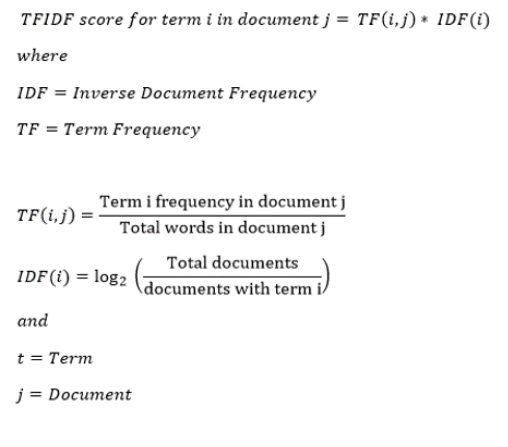

*   Cosine Similarity


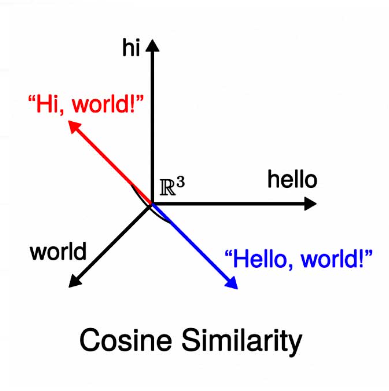



In [ ]:
#this function will extract the text from pdf and preprocess the text using above function
#preform TFIDF vectorisation and create tfidf matrix of FIR data and Lawyers data
#then check the cosine similarity between FIR text and all the lawyers
#return top 10 more similar lawyers
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
!pip install rank_bm25
from rank_bm25 import BM25Okapi
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
def recommend_lawyers(fir_path, num_recommendations=10):

    #FIR to text
    text = ""
    reader = PdfReader(fir_path)

    #extact text from pdf page
    for page in reader.pages:
      text = text + " " + page.extract_text()

    #text preprocessing
    processed_fir = preprocess_text(text)

    #create document of fir data and lawyers data
    documents = [processed_fir] + list(df['tags'])

    #vectorization

    #1 TF-IDF and Cosine similarity
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)


    #cosine similarity
    similarities = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1:])[0]

    print("#"*100)
    print("Using TF-IDF")
    print("Similarity Score")
    print(sorted(similarities, reverse=True)[:11])
    print("\n")
    sorted_indices = np.argsort(similarities)[::-1]
    top_n_indices = sorted_indices[:10]
    recommended_lawyers = df.iloc[top_n_indices]
    print(recommended_lawyers)


    plt.figure(figsize=(10, 6))
    plt.bar(df.iloc[top_n_indices]["name"][:10], similarities[:10], color='blue')
    plt.title("Similarity Scores of Lawyers to FIR")
    plt.xlabel("Lawyer")
    plt.ylabel("Similarity Score")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    #3 bM25
    tokenized_documents = [doc.split() for doc in documents]
    bm25 = BM25Okapi(tokenized_documents)

    # Get BM25 scores
    bm25_scores = bm25.get_scores(tokenized_documents[0])

    print("#"*100)
    print("Using BM25")
    print("Similarity Score")
    print(sorted(bm25_scores, reverse=True)[:11])
    print("\n")
    sorted_indices = np.argsort(bm25_scores)[::-1]
    top_n_indices = sorted_indices[:10]
    recommended_lawyers = df.iloc[top_n_indices]
    print(recommended_lawyers)

    plt.figure(figsize=(10, 6))
    plt.bar(df.iloc[top_n_indices]["name"][:10], bm25_scores[:10], color='blue')
    plt.title("Similarity Scores of Lawyers to FIR")
    plt.xlabel("Lawyer")
    plt.ylabel("Similarity Score")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    #3 bert
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    model = AutoModel.from_pretrained("bert-base-uncased")
    model.to(device)

    encoded_fir = tokenizer(processed_fir, return_tensors='pt').to(device)
    encoded_tags = tokenizer(list(df['tags']), return_tensors='pt', padding=True, truncation=True).to(device)
    print("tokenization done")
    with torch.no_grad():
        embeddings_fir = model(**encoded_fir).last_hidden_state.mean(dim=1)
        embeddings_tags = model(**encoded_tags).last_hidden_state.mean(dim=1)
    print("encoding done")
    similarities_bert = F.cosine_similarity(embeddings_fir, embeddings_tags).cpu().numpy()

    print("#"*100)
    print("Using bert")
    print("Similarity Score")
    print(sorted(similarities_bert, reverse=True)[:11])
    print("\n")
    sorted_indices = np.argsort(bm25_scores)[::-1]
    top_n_indices = sorted_indices[:10]
    recommended_lawyers = df.iloc[top_n_indices]
    print(recommended_lawyers)

    plt.figure(figsize=(10, 6))
    plt.bar(df.iloc[top_n_indices]["name"][:10], similarities_bert[:10], color='blue')
    plt.title("Similarity Scores of Lawyers to FIR")
    plt.xlabel("Lawyer")
    plt.ylabel("Similarity Score")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## FIR report of home abuse by woman against her husband in Bangalore
model should recommand civil lawyer , family lawyer etc.

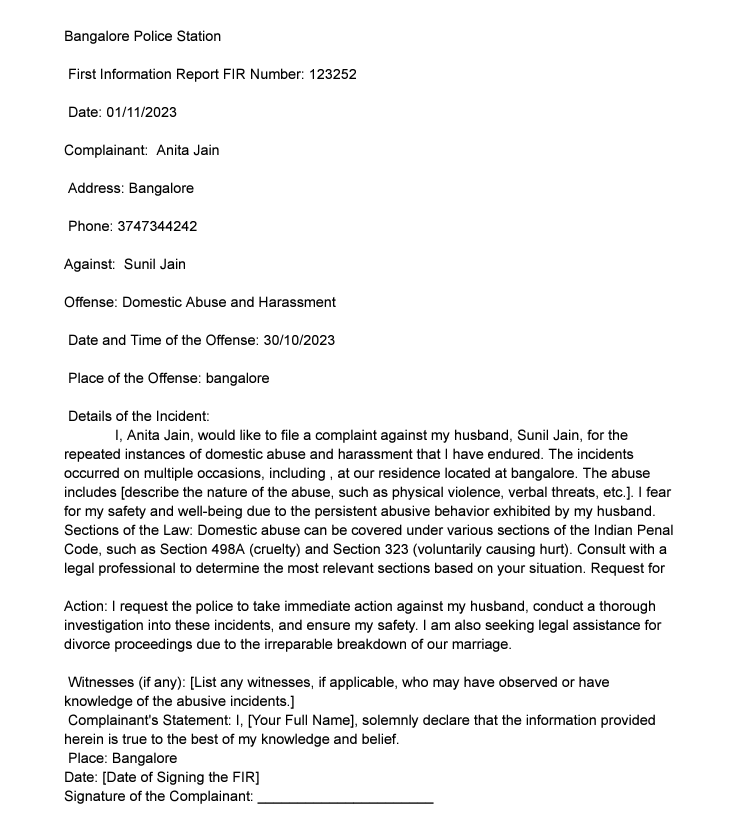

####################################################################################################
Using TF-IDF
Similarity Score
[0.1798347094003967, 0.14069615214837072, 0.1391410200593357, 0.12915344370973048, 0.12892588065650976, 0.1227652388300926, 0.11923620324841404, 0.11726186884323991, 0.11406604278281546, 0.11232338732225527, 0.10842266838694184]


                                name exp         lang  \
149     Advocate Advocate Raju Baroi   6  [English, ]   
51           Advocate Farheen Mushir   9      [Hindi]   
930           Advocate Arvind Kumar   35    [English]   
1974  Advocate Neena Maria Sebastian   1  [English, ]   
1404        Advocate A M Associates   23  [English, ]   
1914            Advocate Srinivas Vk  17  [English, ]   
1655     Advocate Apurva Arcot Umesh   0    [English]   
1135           Advocate Chetan Tayal   1  [English, ]   
415            Advocate Jethindas Kp  18  [English, ]   
1050            Advocate Sangamithra   0    [Tamil, ]   

          

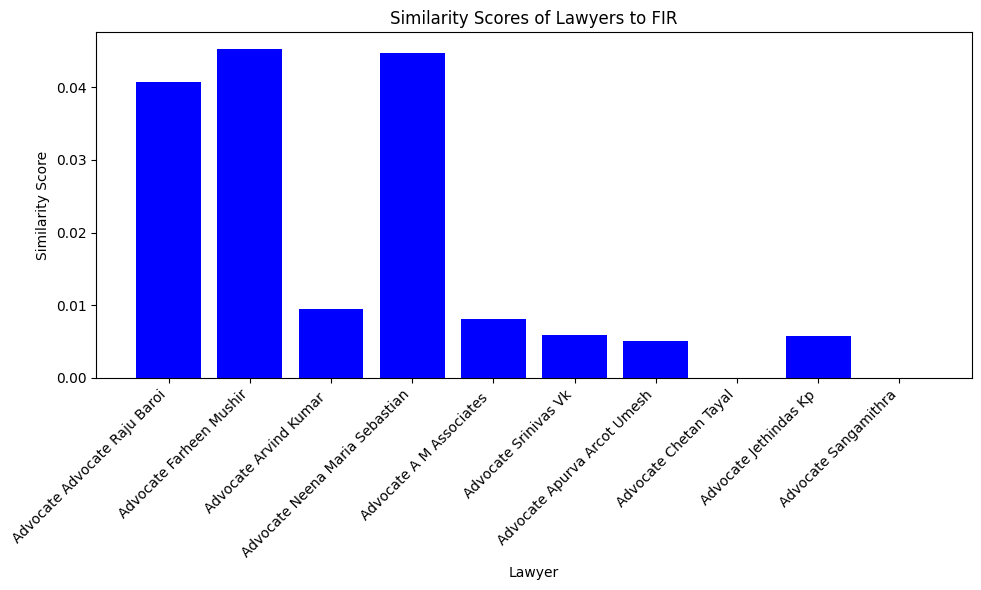

####################################################################################################
Using BM25
Similarity Score
[188.8786627547489, 39.34583292772304, 38.32190126836926, 24.126320841901542, 20.508198986238963, 19.156362078199795, 18.10714472728371, 18.10714472728371, 18.10714472728371, 18.10714472728371, 16.928644357841556]


                                 name exp              lang  \
0                     Advocate Babita  11       [English, ]   
920            Advocate Asif Hussain    1         [English]   
1717  Advocate Gontla Sundara Lakshmi  19         [English]   
150           Advocate M. Lokesh Babu   6       [English, ]   
145      Advocate Ritesh Kumar Dubey    3           [Hindi]   
416                 Advocate Gandhi A   1         [Tamil, ]   
1337            Advocate Faizan Ahmad   4  [English, hindi]   
1939  Advocate Sai Vikranth Deshpande   1       [English, ]   
1051         Advocate Aamir Ahmad Dar   4       [English, ]   
1975                Advoc

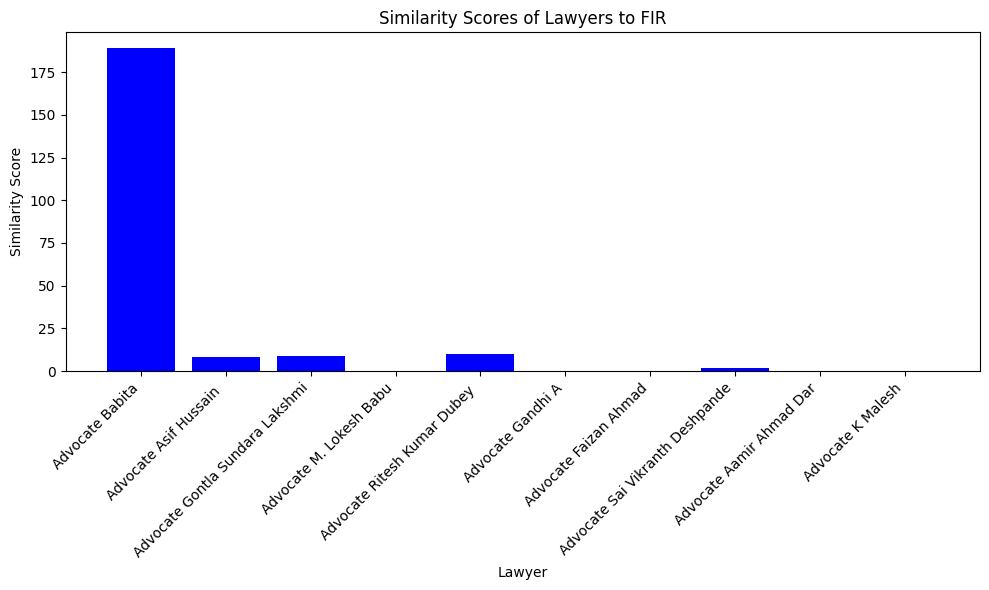

tokenization done
encoding done
####################################################################################################
Using bert
Similarity Score
[0.76409364, 0.7620581, 0.7574484, 0.7573732, 0.75647104, 0.75603014, 0.75542474, 0.75537026, 0.75534374, 0.7551147, 0.7547375]


                                 name exp              lang  \
0                     Advocate Babita  11       [English, ]   
920            Advocate Asif Hussain    1         [English]   
1717  Advocate Gontla Sundara Lakshmi  19         [English]   
150           Advocate M. Lokesh Babu   6       [English, ]   
145      Advocate Ritesh Kumar Dubey    3           [Hindi]   
416                 Advocate Gandhi A   1         [Tamil, ]   
1337            Advocate Faizan Ahmad   4  [English, hindi]   
1939  Advocate Sai Vikranth Deshpande   1       [English, ]   
1051         Advocate Aamir Ahmad Dar   4       [English, ]   
1975                Advocate K Malesh   3           [Tamil]   

               

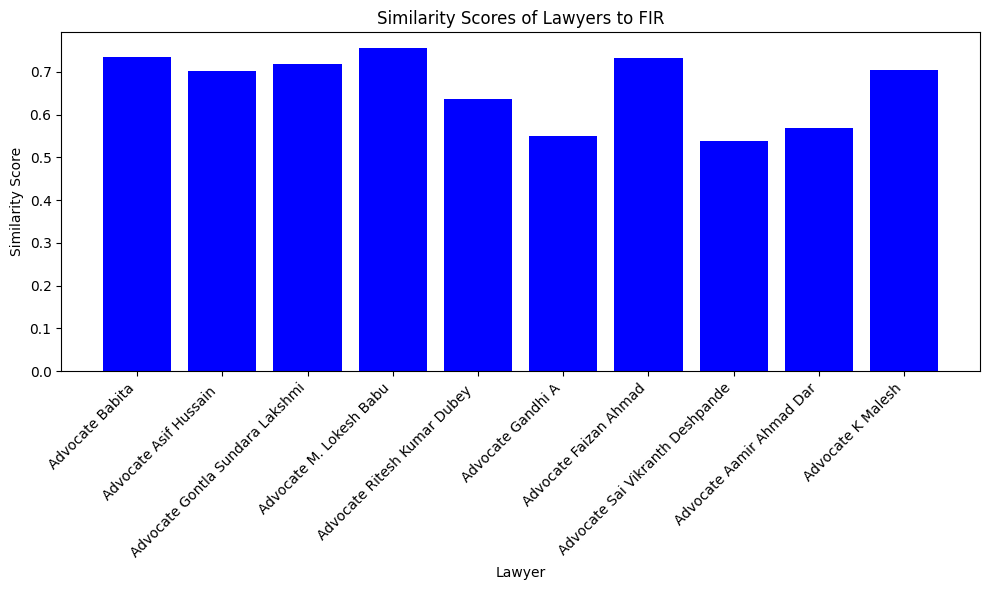

In [ ]:
#input FIR pdf and call recommend_lawyer function and print top 10 relevant lawyers
recommend_lawyers("/content/sample_data/fir report.pdf")

# FIR report of murder and violence in Delhi

model should recommend criminal lawyers of Delhi

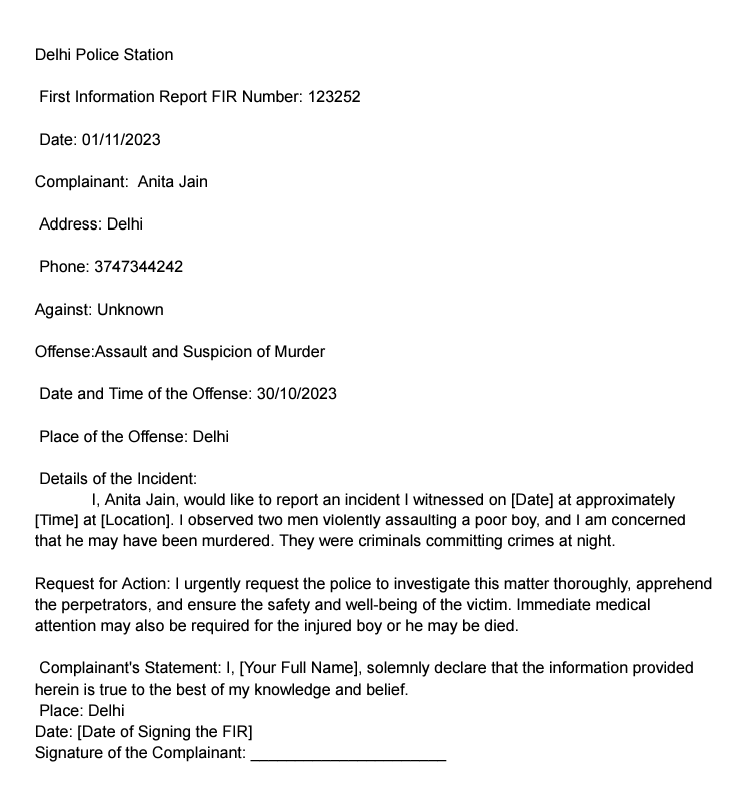

####################################################################################################
Using TF-IDF
Similarity Score
[0.1184751669695959, 0.1184751669695959, 0.1152263815432167, 0.10709723933152271, 0.10709723933152271, 0.1053734853990554, 0.1053734853990554, 0.1053734853990554, 0.10160383231240151, 0.0999749337067083, 0.0998564506983034]


                                name exp              lang  \
1910                 Advocate Shikha  4.         [English]   
1209    Advocate Mrinalini Prabhakar   1       [English, ]   
364            Advocate Divesh Gupta   3       [English, ]   
560   Advocate Advocate Lalit Sharma   5           [Hindi]   
1314              Advocate Uma Saini   7           [HINDI]   
806          Advocate Indira Goswami   6       [English, ]   
1656             Advocate Rohit Jain   2         [English]   
572          Advocate Abhishek Kumar   1         [English]   
266            Advocate Deepak Singh   4         [English]   
11          Advocate Hi

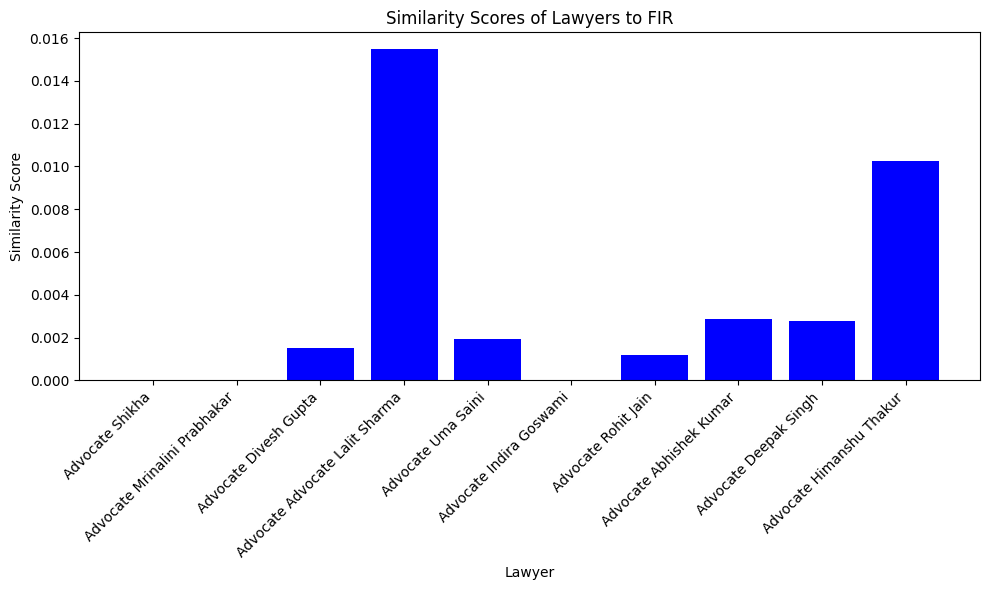

####################################################################################################
Using BM25
Similarity Score
[168.0587953117917, 39.28914841809566, 29.970677976685774, 13.437077065864894, 13.437077065864894, 13.352109585426991, 13.077495742271077, 13.077495742271077, 13.077495742271077, 12.935992699604157, 12.554027094395131]


                                 name exp         lang  \
0                     Advocate Babita  11  [English, ]   
920            Advocate Asif Hussain    1    [English]   
1717  Advocate Gontla Sundara Lakshmi  19    [English]   
27       Advocate Naresh Kumar Jella    4   [Telugu, ]   
1336                 Advocate Sunitha  20  [KANNADA, ]   
398              Advocate Kashif Mohd   5      [Hindi]   
365               Advocate Santhosh N   4  [English, ]   
1315       Advocate Jyothika Johnson    1    [English]   
561           Advocate Shrikant Verma   4    [Hindi, ]   
380              Advocate Bismay Dash  12     [Odia, ]   

           

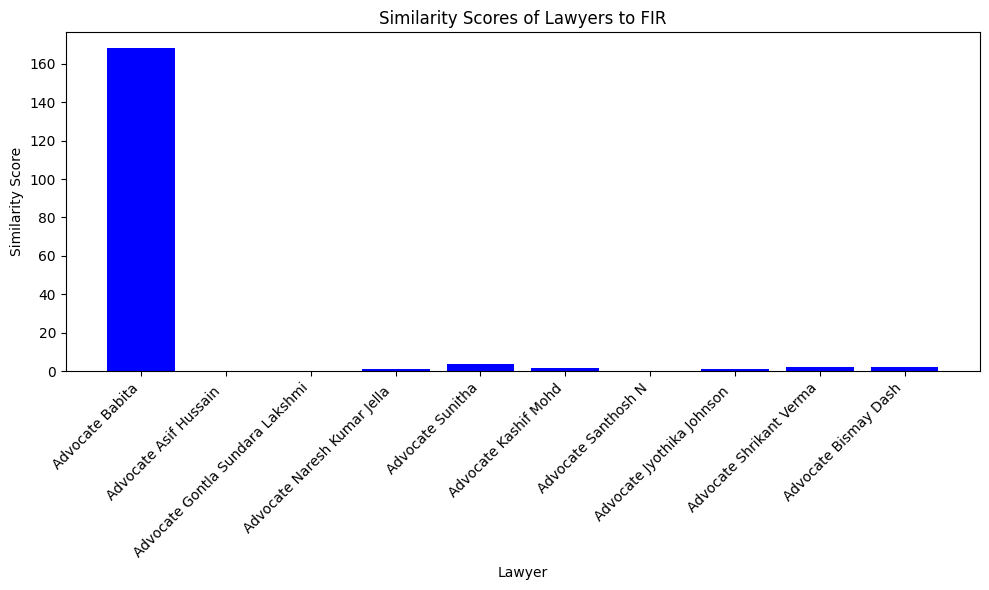

tokenization done
encoding done
####################################################################################################
Using bert
Similarity Score
[0.7830309, 0.7796296, 0.7679082, 0.76780593, 0.765776, 0.75876284, 0.7543829, 0.75392747, 0.7537489, 0.75352633, 0.75271875]


                                 name exp         lang  \
0                     Advocate Babita  11  [English, ]   
920            Advocate Asif Hussain    1    [English]   
1717  Advocate Gontla Sundara Lakshmi  19    [English]   
27       Advocate Naresh Kumar Jella    4   [Telugu, ]   
1336                 Advocate Sunitha  20  [KANNADA, ]   
398              Advocate Kashif Mohd   5      [Hindi]   
365               Advocate Santhosh N   4  [English, ]   
1315       Advocate Jyothika Johnson    1    [English]   
561           Advocate Shrikant Verma   4    [Hindi, ]   
380              Advocate Bismay Dash  12     [Odia, ]   

                                                   spec             loc 

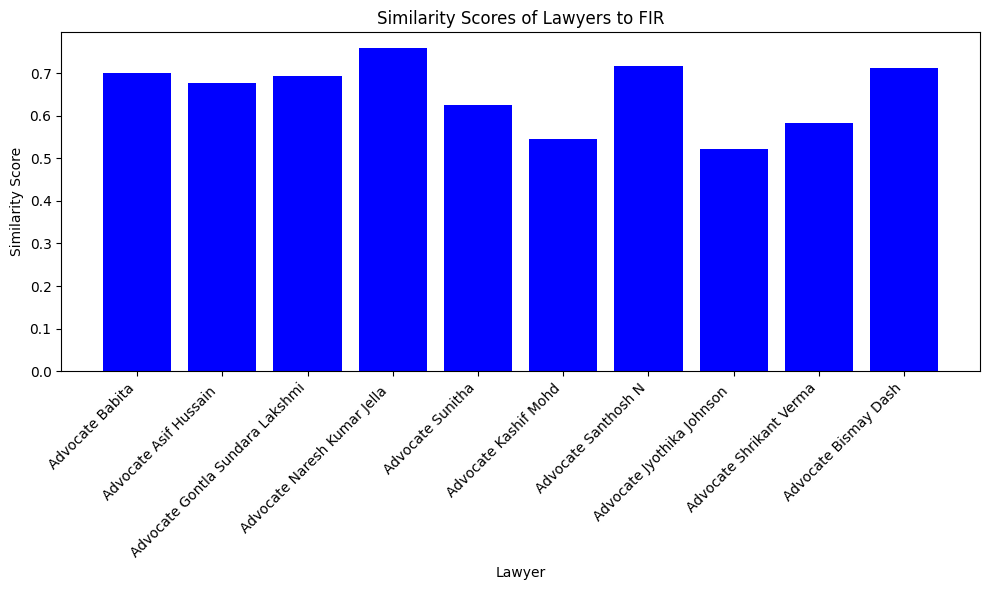

In [ ]:
recommend_lawyers("/content/sample_data/firreportmurder.pdf")